### Apply Unsupervised Methods

Link : https://scikit-learn.org/stable/modules/clustering.html
Link2 : https://www.dummies.com/programming/big-data/data-science/how-to-visualize-the-clusters-in-a-k-means-unsupervised-learning-model/

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import sys
from sklearn.manifold import TSNE

### Load the Dataset

In [5]:
librosa_fma_small_data = pd.read_csv('librosa_fma_small_data.csv',header=0,sep=',')
librosa_fma_small_data = librosa_fma_small_data.reset_index(drop=True)
librosa_fma_small_data = librosa_fma_small_data.dropna()

/home/ayush/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,

### Checking for Null Values

In [6]:
librosa_fma_small_data.isnull().values.any()

False

### Separating the Labels

In [7]:
def remove_duplicate(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

fma_small_parent_genre_id = librosa_fma_small_data['parent_genre_id']
fma_small_parent_genre_title = librosa_fma_small_data['parent_genre_title']

fma_small_parent_genre_title_no_duplicate = remove_duplicate(fma_small_parent_genre_title)

print 'Parent_Title_List Size', len(fma_small_parent_genre_title_no_duplicate)

#Calculating the total number of Genres in FMA Small
print 'Number of Parent Genres in FMA Small: ', len(set(fma_small_parent_genre_title))

# Dropping Parents_genre_title, parent_genre_id, track_id
librosa_fma_small_data = librosa_fma_small_data.drop(['parent_genre_title','parent_genre_id','track_id'],axis=1)

Parent_Title_List Size 8
Number of Parent Genres in FMA Small:  8


In [8]:
print librosa_fma_small_data.shape

(8000, 518)


### Apply Unsupervised Methods

In [12]:
# Apply Data Preprocessing
def apply_data_split_preprocessing(raw_dataset,labels):

    # Perform Basic Preprocessing and Train, Validation Split
    X_train, X_test, y_train, y_test = train_test_split(raw_dataset,labels,test_size=0.10,random_state=42,stratify=labels)
    
    X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.10,random_state=30,stratify=y_train)
    
    # Apply Basic Preprocessing Steps

    print 'Applying Data Preprocessing'

    min_max_scaler = preprocessing.MinMaxScaler()
    X_train_minmax = min_max_scaler.fit_transform(X_train)
    X_val_minmax = min_max_scaler.transform(X_val)
    X_test_minmax = min_max_scaler.transform(X_test)

    return X_train_minmax, X_val_minmax, X_test_minmax ,y_train, y_val ,y_test

#---------------------------------------------------------------------------------------

#Apply Kmeans Clustering
def apply_kmeans_clustering(train_data):
    pca = PCA(n_components=2).fit(train_data)
    pca_2d = pca.transform(train_data)
    
    kmeans = KMeans(n_clusters=8, random_state=0).fit(train_data)
        
    for i in range(0, pca_2d.shape[0]):
        if kmeans.labels_[i] == 0:
            c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='o')
        elif kmeans.labels_[i] == 1:
            c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
        elif kmeans.labels_[i] == 2:
            c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='o')
        elif kmeans.labels_[i] == 3:
            c4 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='c', marker='o')
        elif kmeans.labels_[i] == 4:
            c5 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='m', marker='o')
        elif kmeans.labels_[i] == 5:
            c6 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='y', marker='o')
        elif kmeans.labels_[i] == 6:
            c7 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='k', marker='o')
        elif kmeans.labels_[i] == 7:
            c8 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='orange', marker='o')
            
    plt.legend([c1, c2, c3, c4, c5, c6, c7, c8],['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8'])
    plt.title('K-means clusters the FMA dataset into 8 clusters')
    plt.savefig('./kmeans_clustering_output')
    
#---------------------------------------------------------------------------------------
    
# Apply Spectral Clustering
def apply_spectral_clustering(train_data):
    pca = PCA(n_components=2).fit(train_data)
    pca_2d = pca.transform(train_data)
    
    clustering = SpectralClustering(n_clusters=8,assign_labels="discretize",random_state=0).fit(train_data)
        
    for i in range(0, pca_2d.shape[0]):
        if clustering.labels_[i] == 0:
            c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='o')
        elif clustering.labels_[i] == 1:
            c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
        elif clustering.labels_[i] == 2:
            c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='o')
        elif clustering.labels_[i] == 3:
            c4 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='c', marker='o')
        elif clustering.labels_[i] == 4:
            c5 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='m', marker='o')
        elif clustering.labels_[i] == 5:
            c6 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='y', marker='o')
        elif clustering.labels_[i] == 6:
            c7 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='k', marker='o')
        elif clustering.labels_[i] == 7:
            c8 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='orange', marker='o')
            
    plt.legend([c1, c2, c3, c4, c5, c6, c7, c8],['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8'])
    plt.title('Spectral clusters the FMA dataset into 8 clusters')
    plt.savefig('./spectral_clustering_output')
    
#-----------------------------------------------------------------------------------------


#Apply PCA

def apply_pca(train_data,y_train):
    
    y_train = list(y_train)    
    pca = PCA(n_components=2).fit(train_data)
    pca_2d = pca.transform(train_data)
    
    for i in range(0, pca_2d.shape[0]):
        if y_train[i] == 21.0:
            c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='o')
        elif y_train[i] == 10.0:
            c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
        elif y_train[i] == 17.0:
            c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='o')
        elif y_train[i] == 38.0:
            c4 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='c', marker='o')
        elif y_train[i]== 12.0:
            c5 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='m', marker='o')
        elif y_train[i]==2.0:
            c6 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='y', marker='o')
        elif y_train[i]==15.0:
            c7 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='k', marker='o')
        elif y_train[i] == 1235.0:
            c8 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='orange', marker='o')
    
    plt.legend([c1, c2, c3, c4, c5, c6, c7, c8],['Hip_Hop','Pop','Folk','Experimental','Rock','International','Electronic','Instrumental'])
    plt.title('PCA Visualization of FMA dataset')
    plt.savefig('./pca_output')
    
#--------------------------------------------------------------------------------
#Apply Density Based Clustering
def apply_dbscan_clustering(train_data):
    
    pca = PCA(n_components=2).fit(train_data)
    pca_2d = pca.transform(train_data)
    
    clustering = DBSCAN(eps=3, min_samples=800).fit(train_data)
    
    print set(clustering.labels_)
            
    for i in range(0, pca_2d.shape[0]):
        if clustering.labels_[i] == 0:
            c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='o')
        elif clustering.labels_[i] == -1:
            c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
            
    plt.legend([c1, c2],['Cluster 1', 'Cluster 2'])
    plt.title('DBSCAN Clustering on FMA Dataset')
    plt.savefig('./DBSCAN_clustering_output')
    
#--------------------------------------------------------------------------------

def apply_tsne(train_data,y_train):
    
    y_train = list(y_train)    
    tsne_embedded = TSNE(n_components=2).fit_transform(train_data)
    
    for i in range(0, tsne_embedded.shape[0]):
        if y_train[i] == 21.0:
            c1 = plt.scatter(tsne_embedded[i,0],tsne_embedded[i,1],c='b', marker='o')
        elif y_train[i] == 10.0:
            c2 = plt.scatter(tsne_embedded[i,0],tsne_embedded[i,1],c='g', marker='o')
        elif y_train[i] == 17.0:
            c3 = plt.scatter(tsne_embedded[i,0],tsne_embedded[i,1],c='r', marker='o')
        elif y_train[i] == 38.0:
            c4 = plt.scatter(tsne_embedded[i,0],tsne_embedded[i,1],c='c', marker='o')
        elif y_train[i]== 12.0:
            c5 = plt.scatter(tsne_embedded[i,0],tsne_embedded[i,1],c='m', marker='o')
        elif y_train[i]==2.0:
            c6 = plt.scatter(tsne_embedded[i,0],tsne_embedded[i,1],c='y', marker='o')
        elif y_train[i]==15.0:
            c7 = plt.scatter(tsne_embedded[i,0],tsne_embedded[i,1],c='k', marker='o')
        elif y_train[i] == 1235.0:
            c8 = plt.scatter(tsne_embedded[i,0],tsne_embedded[i,1],c='orange', marker='o')
    
    plt.legend([c1, c2, c3, c4, c5, c6, c7, c8],['Hip_Hop','Pop','Folk','Experimental','Rock','International','Electronic','Instrumental'])
    plt.title('TSNE Visualization of FMA dataset')
    plt.savefig('./tsne_output')

In [9]:
librosa_fma_small_data_array = librosa_fma_small_data.values
print librosa_fma_small_data_array.shape

#print remove_duplicate(list(fma_small_parent_genre_id))

(8000, 518)


### Data Preprocessing and Splitting

In [10]:
# Preprocess data
X_train_preprocessed, X_val_preprocessed ,X_test_preprocessed, y_train, y_val ,y_test = apply_data_split_preprocessing(librosa_fma_small_data_array,fma_small_parent_genre_id)

print 'Training Dataset Size: ', X_train_preprocessed.shape, y_train.shape
print 'Validation Dataset Size: ', X_val_preprocessed.shape, y_val.shape
print 'Testing Dataset Size: ', X_test_preprocessed.shape, y_test.shape

Applying Data Preprocessing


/home/ayush/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Training Dataset Size:  (6480, 518) (6480,)
Validation Dataset Size:  (720, 518) (720,)
Testing Dataset Size:  (800, 518) (800,)


### Perform Clustering

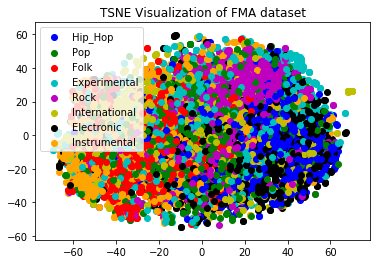

In [13]:
#Apply PCA
#apply_pca(X_train_preprocessed,y_train)


#Apply Kmeans
#apply_kmeans_clustering(X_train_preprocessed)

#Apply Spectral Clustering
#apply_spectral_clustering(X_train_preprocessed)

#Apply Density Based Clustering
#apply_dbscan_clustering(X_train_preprocessed)

#Apply TSNE
apply_tsne(X_train_preprocessed,y_train)